In [6]:
import torch
import numpy as np

# 数学
- 特征向量
    - 设 A 是 n 阶方阵，如果存在数 λ 和非零 n 维列向量 x，使得成立，则称 λ 是方阵 A 的一个特征值，x 为方阵 A 对应于特征值 λ 的一个特征向量。
    - 简单来说，特征向量是在矩阵变换下只进行伸缩，而方向不变（或变成相反方向）的非零向量。伸缩的比例就是对应的特征值。
 
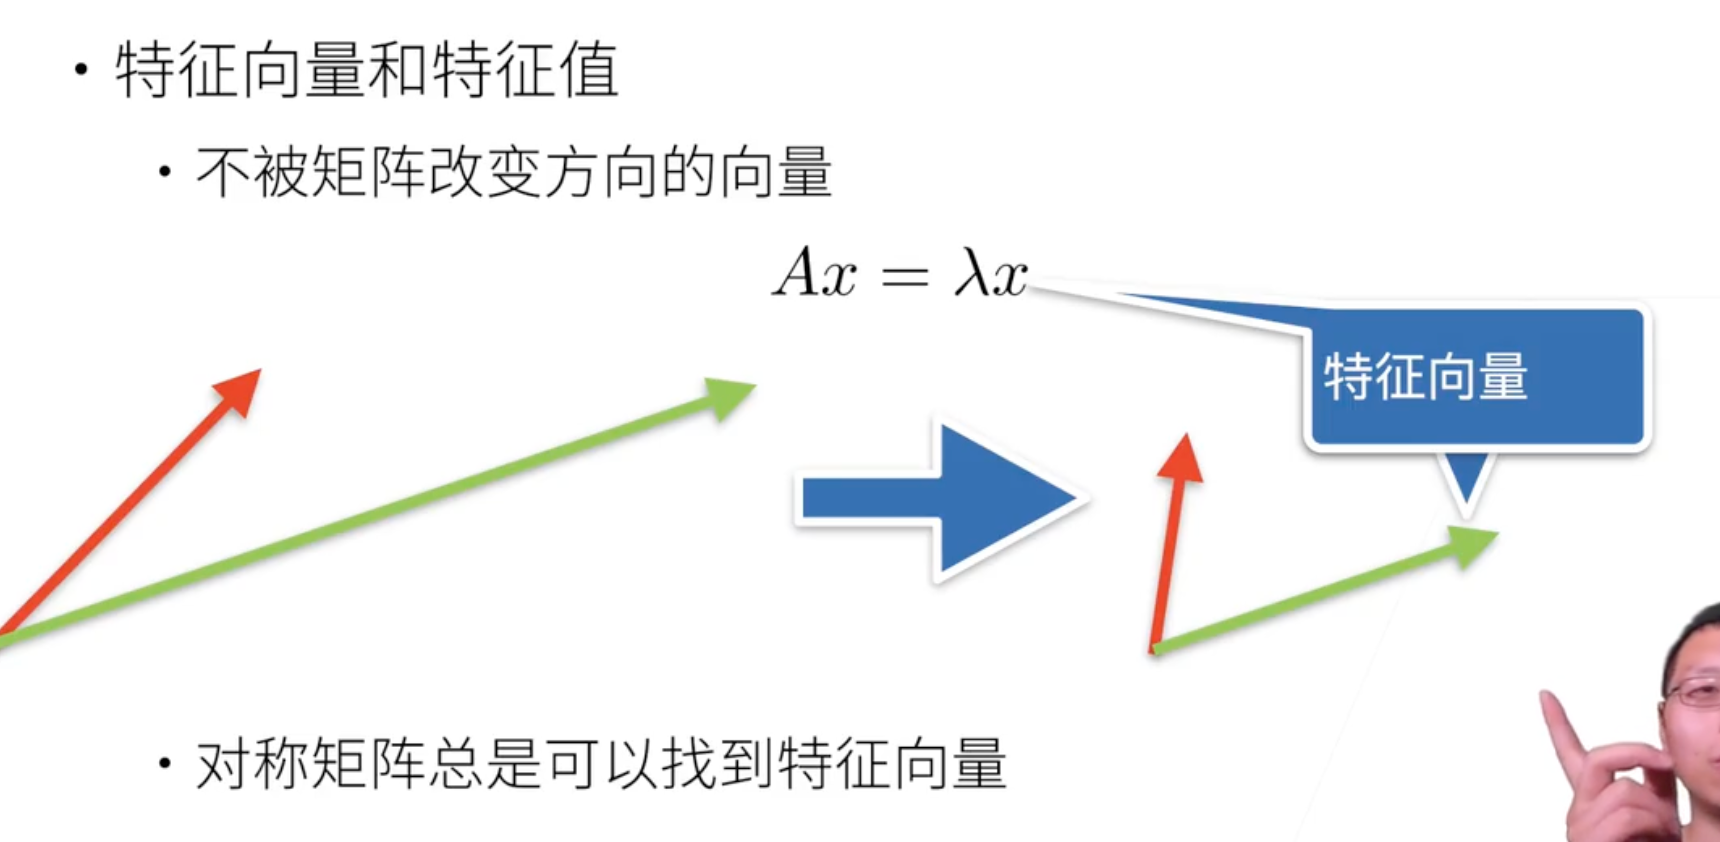

# 代码实现


- 矩阵
    - 我理解多维矩阵可以从最后一个纬度开始看，比如这里是从4开始看，4个元素的向量；然后是(3,4),是个二维矩阵。一共有3个这样的二维矩阵，最后一层是2.
    - 换句话说，纬度从左到到右就是从外到内；从右到左就是从内到外。

In [13]:
A=torch.arange(72).reshape(2,3,3,4)
A

tensor([[[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],

         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]],

         [[24, 25, 26, 27],
          [28, 29, 30, 31],
          [32, 33, 34, 35]]],


        [[[36, 37, 38, 39],
          [40, 41, 42, 43],
          [44, 45, 46, 47]],

         [[48, 49, 50, 51],
          [52, 53, 54, 55],
          [56, 57, 58, 59]],

         [[60, 61, 62, 63],
          [64, 65, 66, 67],
          [68, 69, 70, 71]]]])

- clone
  - 通过分配新内存，将A的一个副本分配给B
  - 如果不克隆，在 Python 中，当你执行B = A这种赋值语句时，实际上是进行了浅拷贝操作。对于 PyTorch 中的张量也是如此。**【浅拷贝意味着B和A实际上指向内存中的同一个对象。也就是说，它们的id（内存地址）是相同的】** 在这种情况下，A和B共享数据存储空间。对A的操作会直接影响B，反之亦然。

In [19]:
A=torch.arange(12,dtype=torch.float32).reshape(3,4)
B=A.clone()  # 当你对克隆得到的张量进行操作时，不会影响到原始张量
id(A)==id(B)

False

Hadamard积
- 具体而言，[**两个矩阵的按元素乘法称为*Hadamard积*（Hadamard product）（数学符号$\odot$）**]。
对于矩阵$\mathbf{B} \in \mathbb{R}^{m \times n}$，
其中第$i$行和第$j$列的元素是$b_{ij}$。

In [26]:
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.]])

点积
- 给定两个向量$\mathbf{x},\mathbf{y}\in\mathbb{R}^d$，
它们的*点积*（dot product）$\mathbf{x}^\top\mathbf{y}$
（或$\langle\mathbf{x},\mathbf{y}\rangle$）
是相同位置的按元素乘积的和：$\mathbf{x}^\top \mathbf{y} = \sum_{i=1}^{d} x_i y_i$。
- 注意⚠️：在pytorch0.3之后，tensor.dot()方法进行了更新，只能对1维的tensor进行点成运算。所以只要检查一下自己输入的tensor是否为1维即可，此外tensor.dot()方法不能进行广播。

In [51]:
x=torch.arange(12,dtype=torch.float32)
y = torch.randn(12, dtype = torch.float32)
torch.dot(x,y)

tensor(42.4537)

In [55]:
sum(x*y)  #我们可以通过执行按元素乘法，然后进行求和来表示两个向量的点积)

tensor(42.4537)

## 降维


假设我们有一个三维数组B，形状为(p, m, n)。
- axis = 0
    - 当axis = 0时，求和操作是沿着第一个维度（即p方向）进行的。这相当于将p个形状为(m, n)的二维数组对应位置的元素相加，结果是一个形状为(m, n)的二维数组。
- axis = 1
    - 当axis = 1时，求和操作是沿着第二个维度（即m方向）进行的。这相当于将每个p对应的m行元素相加，结果是一个形状为(p, n)的二维数组。
      
以此类推  
- 当 keepdims = True 时，求和后的结果会保持相应的维度，只是对应维度的大小会变为 1。
- axis是numpy，dim是pytorch中的用法 本质一致

In [100]:
A=torch.ones(2,3,4)
A.shape,A.sum(dim=0).shape,A.mean(dim=1,keepdims=True).shape

(torch.Size([2, 3, 4]), torch.Size([3, 4]), torch.Size([2, 1, 4]))

In [102]:
A.sum(axis=[0, 1]) # 同时对两个纬度求和也是可以的

tensor([6., 6., 6., 6.])

___

点积在很多场合都很有用。
例如，给定一组由向量$\mathbf{x} \in \mathbb{R}^d$表示的值，
和一组由$\mathbf{w} \in \mathbb{R}^d$表示的权重。
$\mathbf{x}$中的值根据权重$\mathbf{w}$的加权和，
可以表示为点积$\mathbf{x}^\top \mathbf{w}$。
当权重为非负数且和为1（即$\left(\sum_{i=1}^{d}{w_i}=1\right)$）时，
点积表示*加权平均*（weighted average）。
将两个向量规范化得到单位长度后，点积表示它们夹角的余弦。
本节后面的内容将正式介绍*长度*（length）的概念。

## 矩阵-向量积

现在我们知道如何计算点积，可以开始理解*矩阵-向量积*（matrix-vector product）。
回顾分别在 :eqref:`eq_matrix_def`和 :eqref:`eq_vec_def`中定义的矩阵$\mathbf{A} \in \mathbb{R}^{m \times n}$和向量$\mathbf{x} \in \mathbb{R}^n$。
让我们将矩阵$\mathbf{A}$用它的行向量表示：

$$\mathbf{A}=
\begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_m \\
\end{bmatrix},$$

其中每个$\mathbf{a}^\top_{i} \in \mathbb{R}^n$都是行向量，表示矩阵的第$i$行。
[**矩阵向量积$\mathbf{A}\mathbf{x}$是一个长度为$m$的列向量，
其第$i$个元素是点积$\mathbf{a}^\top_i \mathbf{x}$**]：

$$
\mathbf{A}\mathbf{x}
= \begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_m \\
\end{bmatrix}\mathbf{x}
= \begin{bmatrix}
 \mathbf{a}^\top_{1} \mathbf{x}  \\
 \mathbf{a}^\top_{2} \mathbf{x} \\
\vdots\\
 \mathbf{a}^\top_{m} \mathbf{x}\\
\end{bmatrix}.
$$



在代码中使用张量表示矩阵-向量积，我们使用mv函数。 当我们为矩阵A和向量x调用torch.mv(A, x)时，会执行矩阵-向量积。 注意，A的列维数（沿轴1的长度）必须与x的维数（其长度）相同。

In [61]:
# 尝试矩阵乘列向量
A=torch.arange(12).reshape(4,3)
x=torch.arange(3)
A,x,torch.mv(A,x)

(tensor([[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11]]),
 tensor([0, 1, 2]),
 tensor([ 5, 14, 23, 32]))

## 矩阵-矩阵乘法

在掌握点积和矩阵-向量积的知识后，
那么**矩阵-矩阵乘法**（matrix-matrix multiplication）应该很简单。

假设有两个矩阵$\mathbf{A} \in \mathbb{R}^{n \times k}$和$\mathbf{B} \in \mathbb{R}^{k \times m}$：

$$\mathbf{A}=\begin{bmatrix}
 a_{11} & a_{12} & \cdots & a_{1k} \\
 a_{21} & a_{22} & \cdots & a_{2k} \\
\vdots & \vdots & \ddots & \vdots \\
 a_{n1} & a_{n2} & \cdots & a_{nk} \\
\end{bmatrix},\quad
\mathbf{B}=\begin{bmatrix}
 b_{11} & b_{12} & \cdots & b_{1m} \\
 b_{21} & b_{22} & \cdots & b_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
 b_{k1} & b_{k2} & \cdots & b_{km} \\
\end{bmatrix}.$$

用行向量$\mathbf{a}^\top_{i} \in \mathbb{R}^k$表示矩阵$\mathbf{A}$的第$i$行，并让列向量$\mathbf{b}_{j} \in \mathbb{R}^k$作为矩阵$\mathbf{B}$的第$j$列。要生成矩阵积$\mathbf{C} = \mathbf{A}\mathbf{B}$，最简单的方法是考虑$\mathbf{A}$的行向量和$\mathbf{B}$的列向量:

$$\mathbf{A}=
\begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_n \\
\end{bmatrix},
\quad \mathbf{B}=\begin{bmatrix}
 \mathbf{b}_{1} & \mathbf{b}_{2} & \cdots & \mathbf{b}_{m} \\
\end{bmatrix}.
$$
当我们简单地将每个元素$c_{ij}$计算为点积$\mathbf{a}^\top_i \mathbf{b}_j$:

$$\mathbf{C} = \mathbf{AB} = \begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_n \\
\end{bmatrix}
\begin{bmatrix}
 \mathbf{b}_{1} & \mathbf{b}_{2} & \cdots & \mathbf{b}_{m} \\
\end{bmatrix}
= \begin{bmatrix}
\mathbf{a}^\top_{1} \mathbf{b}_1 & \mathbf{a}^\top_{1}\mathbf{b}_2& \cdots & \mathbf{a}^\top_{1} \mathbf{b}_m \\
 \mathbf{a}^\top_{2}\mathbf{b}_1 & \mathbf{a}^\top_{2} \mathbf{b}_2 & \cdots & \mathbf{a}^\top_{2} \mathbf{b}_m \\
 \vdots & \vdots & \ddots &\vdots\\
\mathbf{a}^\top_{n} \mathbf{b}_1 & \mathbf{a}^\top_{n}\mathbf{b}_2& \cdots& \mathbf{a}^\top_{n} \mathbf{b}_m
\end{bmatrix}.
$$

[**我们可以将矩阵-矩阵乘法$\mathbf{AB}$看作简单地执行$m$次矩阵-向量积，并将结果拼接在一起，形成一个$n \times m$矩阵**]。


In [67]:
# 矩阵乘法
C=torch.arange(12,dtype=torch.float32).reshape(3,4)
D=torch.ones(8,dtype=torch.float32).reshape(4,2)
torch.mm(C,D)

tensor([[ 6.,  6.],
        [22., 22.],
        [38., 38.]])

- 矩阵-矩阵乘法可以简单地称为矩阵乘法，不应与"Hadamard积"混淆。

矩阵-矩阵乘法可以简单地称为**矩阵乘法**，不应与"Hadamard积"混淆。

## 范数

线性代数中最有用的一些运算符是*范数*（norm）。
非正式地说，向量的*范数*是表示一个向量有多大。
这里考虑的*大小*（size）概念不涉及维度，而是分量的大小。

在线性代数中，向量范数是将向量映射到标量的函数$f$。
给定任意向量$\mathbf{x}$，向量范数要满足一些属性。
第一个性质是：如果我们按常数因子$\alpha$缩放向量的所有元素，
其范数也会按相同常数因子的*绝对值*缩放：

$$f(\alpha \mathbf{x}) = |\alpha| f(\mathbf{x}).$$

第二个性质是熟悉的三角不等式:

$$f(\mathbf{x} + \mathbf{y}) \leq f(\mathbf{x}) + f(\mathbf{y}).$$

第三个性质简单地说范数必须是非负的:

$$f(\mathbf{x}) \geq 0.$$

这是有道理的。因为在大多数情况下，任何东西的最小的*大小*是0。
最后一个性质要求范数最小为0，当且仅当向量全由0组成。

$$\forall i, [\mathbf{x}]_i = 0 \Leftrightarrow f(\mathbf{x})=0.$$

范数听起来很像距离的度量。
欧几里得距离和毕达哥拉斯定理中的非负性概念和三角不等式可能会给出一些启发。
事实上，欧几里得距离是一个$L_2$范数：
假设$n$维向量$\mathbf{x}$中的元素是$x_1,\ldots,x_n$，其[**$L_2$*范数*是向量元素平方和的平方根：**]

(**$$\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n x_i^2},$$**)

其中，在$L_2$范数中常常省略下标$2$，也就是说$\|\mathbf{x}\|$等同于$\|\mathbf{x}\|_2$。
在代码中，我们可以按如下方式计算向量的$L_2$范数。


深度学习中更经常地使用$L_2$范数的平方，也会经常遇到[**$L_1$范数，它表示为向量元素的绝对值之和：**]

(**$$\|\mathbf{x}\|_1 = \sum_{i=1}^n \left|x_i \right|.$$**)

与$L_2$范数相比，$L_1$范数受异常值的影响较小。
为了计算$L_1$范数，我们将绝对值函数和按元素求和组合起来。


In [79]:
torch.norm(C)  #第二范数

tensor(22.4944)

In [81]:
C.abs().sum() #第一范数

tensor(66.)


类似于向量的$L_2$范数，[**矩阵**]$\mathbf{X} \in \mathbb{R}^{m \times n}$(**的*Frobenius范数*（Frobenius norm）是矩阵元素平方和的平方根：**)

(**$$\|\mathbf{X}\|_F = \sqrt{\sum_{i=1}^m \sum_{j=1}^n x_{ij}^2}.$$**)

Frobenius范数满足向量范数的所有性质，它就像是矩阵形向量的$L_2$范数。
调用以下函数将计算矩阵的Frobenius范数。同样也是使用torch.norm(#matrix)代码